In [1]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [2]:
# Import data
# !wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [3]:
# EDA & Preprocessing
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
dataset.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [5]:
dataset['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [6]:
# Convert categorical column 'sex' to integer
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
dataset['sex'] = label_encoder.fit_transform(dataset['sex'])
dataset['sex'].head()
# Female = 0, Male = 1

0    0
1    1
2    1
3    1
4    1
Name: sex, dtype: int32

In [7]:
dataset['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [8]:
# Convert categorical column 'smoker' to integer
dataset['smoker'] = label_encoder.fit_transform(dataset['smoker'])
dataset['smoker'].head()
# No = 0, Yes = 1

0    1
1    0
2    0
3    0
4    0
Name: smoker, dtype: int32

In [9]:
dataset['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [10]:
# Convert categorical column 'region' to integer
dataset['region'] = label_encoder.fit_transform(dataset['region'])
dataset['region'].head()
# Northeast = 0, Northwest = 1, Southeast = 2, Southwest = 3

0    3
1    2
2    2
3    1
4    1
Name: region, dtype: int32

In [11]:
# Confirming completed transformations
dataset.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86


In [12]:
# Splitting Test and Training data
from sklearn.model_selection import train_test_split
train_dataset, test_dataset = train_test_split(dataset, test_size = 0.2)

# Separate labels from features
train_labels = train_dataset.pop('expenses')
test_labels = test_dataset.pop('expenses')

In [13]:
# Building the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation = 'relu', input_shape = [len(train_dataset.keys())]),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(1)])

model.compile(optimizer ='adam', loss ='mae', metrics = ['mae', 'mse'])

history = model.fit(train_dataset, train_labels, epochs = 100, validation_split = 0.2)

# Evaluate the model
loss = model.evaluate(test_dataset, test_labels)
print("Mean Absolute Error on test dataset:", loss)

Epoch 1/100
27/27 [==============================] - 1s 6ms/step - loss: 13444.1133 - mae: 13444.1133 - mse: 326484992.0000 - val_loss: 12806.7539 - val_mae: 12806.7539 - val_mse: 316687328.0000
Epoch 2/100
27/27 [==============================] - 0s 2ms/step - loss: 13034.6689 - mae: 13034.6689 - mse: 315066208.0000 - val_loss: 11870.6543 - val_mae: 11870.6543 - val_mse: 291397120.0000
Epoch 3/100
27/27 [==============================] - 0s 2ms/step - loss: 10997.9727 - mae: 10997.9727 - mse: 262272448.0000 - val_loss: 8438.6230 - val_mae: 8438.6230 - val_mse: 203495456.0000
Epoch 4/100
27/27 [==============================] - 0s 2ms/step - loss: 7820.5776 - mae: 7820.5776 - mse: 162863376.0000 - val_loss: 7546.0630 - val_mae: 7546.0630 - val_mse: 144441456.0000
Epoch 5/100
27/27 [==============================] - 0s 2ms/step - loss: 7598.5288 - mae: 7598.5288 - mse: 152065168.0000 - val_loss: 7270.7769 - val_mae: 7270.7769 - val_mse: 152283648.0000
Epoch 6/100
27/27 [================

9/9 - 0s - loss: 3008.8706 - mae: 3008.8706 - mse: 38033392.0000 - 18ms/epoch - 2ms/step
Testing set Mean Abs Error: 3008.87 expenses
You passed the challenge. Great job!
9/9 [==============================] - 0s 751us/step


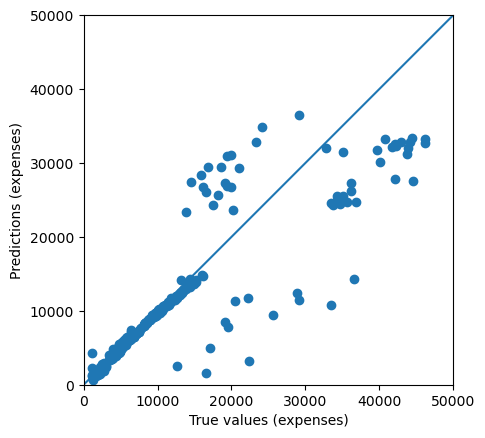

In [14]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)

In [15]:
# Function to preprocess user input
def preprocess_input(age, sex, bmi, children, smoker, region):
    # Convert categorical inputs to numerical format
    sex = 1 if sex.lower() == 'male' else 0
    smoker = 1 if smoker.lower() == 'yes' else 0
    region_mapping = {'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3}
    region = region_mapping.get(region.lower(), -1)
    
    # Return preprocessed input as numpy array
    return np.array([[age, sex, bmi, children, smoker, region]])

# Get user input
age = int(input("Enter age: "))
sex = input("Enter sex (male/female): ")
bmi = float(input("Enter BMI: "))
children = int(input("Enter number of children: "))
smoker = input("Smoker? (yes/no): ")
region = input("Enter region (southwest/southeast/northwest/northeast): ")

# Preprocess user input
input_data = preprocess_input(age, sex, bmi, children, smoker, region)

# Predict expenses
predicted_expenses = model.predict(input_data)[0][0]

# Display predicted expenses
print("Predicted healthcare expenses: ${:.2f}".format(predicted_expenses))

Enter age:  50
Enter sex (male/female):  female
Enter BMI:  28
Enter number of children:  5
Smoker? (yes/no):  no
Enter region (southwest/southeast/northwest/northeast):  southeast


1/1 [==============================] - 0s 34ms/step
Predicted healthcare expenses: $11930.25
